In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.figure
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.utils import to_categorical
def decode(datum):
    y = np.zeros((datum.shape[0],1))
    for i in range(datum.shape[0]):
        y[i] = np.argmax(datum[i])
    return y
def encode(datum):
    return to_categorical(datum)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/Sayantika


/content/drive/MyDrive/Sayantika


In [ ]:
 print("Loading Data ...")
Data = np.loadtxt("/content/drive/MyDrive/Sayantika/RF_Data_raw.csv", delimiter=",")

Loading Data ...


In [ ]:
Data1 = np.loadtxt("/content/drive/MyDrive/Sayantika/RF_Data_freq.csv", delimiter=",")
Data1.shape

(2051, 11350)

In [ ]:
Data[50000:50003,:]

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 9., 9., 9.]])

In [ ]:
Data.shape

(50003, 11350)

In [ ]:
print("Preparing Data ...")
x = np.transpose(Data[0:50000,:])
Label_1 = np.transpose(Data[50000:50001,:]); Label_1 = Label_1.astype(int);
Label_2 = np.transpose(Data[50001:50002,:]); Label_2 = Label_2.astype(int);
Label_3 = np.transpose(Data[50002:50003,:]); Label_3 = Label_3.astype(int);
y1 = encode(Label_1)
y2 = encode(Label_2)
y3 = encode(Label_3)

Preparing Data ...


In [ ]:
print(Data[:50000,0:1].shape)

(50000, 1)


In [ ]:
print("Preparing Data1 of freq domain ...")
x_f = np.transpose(Data1[0:2047,:])
Label_1_f = np.transpose(Data1[2048:2049,:]); Label_1_f = Label_1_f.astype(int);
Label_2_f = np.transpose(Data1[2049:2050,:]); Label_2_f = Label_2_f.astype(int);
Label_3_f = np.transpose(Data1[2050:2051,:]); Label_3_f = Label_3_f.astype(int);
y1_f = encode(Label_1_f)
y2_f = encode(Label_2_f)
y3_f = encode(Label_3_f)

Preparing Data1 of freq domain ...


In [ ]:
print(np.array_equal(y1_f,y1))
print(np.array_equal(y2_f,y2))
print(np.array_equal(y3_f,y3))

True
True
True


In [ ]:
y3

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
# d_y2 = decode(y2)
# d_y2

In [ ]:
x_r = x[:,:5000]
x_r.shape

(11350, 5000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_f, x_test_f, x_train_r, x_test_r, y_train, y_test = train_test_split(x_f, x_r, y2, test_size=0.2, random_state=43, shuffle=True)
print(x_train_r.shape)
print(x_train_f.shape)
print(y_train.shape)
print(x_test_r.shape)
print(x_test_f.shape)
print(y_test.shape)

(9080, 5000)
(9080, 2047)
(9080, 4)
(2270, 5000)
(2270, 2047)
(2270, 4)


In [ ]:
x_train_r

array([[ 0.0000e+00, -6.8493e-04, -3.4247e-04, ..., -1.0274e-03,
         1.0274e-03, -1.0274e-03],
       [-6.6313e-05,  1.9894e-04, -1.3263e-04, ...,  6.6313e-05,
        -6.6313e-05, -6.6313e-05],
       [ 0.0000e+00,  1.8031e-04, -2.7047e-04, ..., -1.8031e-04,
        -9.0155e-05,  1.8031e-04],
       ...,
       [-1.0899e-03,  2.7248e-04,  1.0899e-03, ...,  0.0000e+00,
         0.0000e+00,  5.4496e-04],
       [-3.6062e-04, -9.0155e-05,  0.0000e+00, ...,  9.0155e-05,
        -2.7047e-04,  0.0000e+00],
       [ 2.6757e-04,  0.0000e+00, -8.9190e-05, ...,  1.7838e-04,
         0.0000e+00, -1.7838e-04]])

In [ ]:
# reshape input to be [samples, time steps, features = 1] as the model requires this 3D shape imput
x_train_r = np.reshape(x_train_r, (x_train_r.shape[0], x_train_r.shape[1], 1))
x_test_r = np.reshape(x_test_r, (x_test_r.shape[0], x_test_r.shape[1], 1))
x_train_f = np.reshape(x_train_f, (x_train_f.shape[0], x_train_f.shape[1], 1))
x_test_f = np.reshape(x_test_f, (x_test_f.shape[0], x_test_f.shape[1], 1))
print(x_train_r.shape)
print(x_test_r.shape)
print(x_train_f.shape)
print(x_test_f.shape)

(9080, 5000, 1)
(2270, 5000, 1)
(9080, 2047, 1)
(2270, 2047, 1)


## MAKING SPECTOGRAM

In [ ]:
x.shape #time domain data

(11350, 50000)

In [ ]:
from scipy import signal
x_list=[]
r=x.shape[0]
# nfft=400
# hop_length=190;sr=4000
for i in range (r):
    clip=x[i,:]
    f, t, Sxx = signal.spectrogram(clip, nfft = 400)
    # stft = librosa.stft(clip, n_fft=nfft, hop_length=hop_length)
    # spectrogram = np.abs(stft)
    # log_spectrogram = librosa.amplitude_to_db(spectrogram)
    # norm_logspec=(log_spectrogram-np.min(log_spectrogram))/(np.max(log_spectrogram)-np.min(log_spectrogram))# normalise the spectrogram:==>> x_norm=(x-mean(x))/std_dev(x)
    x_list.append(Sxx)

In [ ]:
#spec of 1 rf signal
from scipy import signal
r=x.shape[0]
clip=x[1,:]
f, t, Sxx = signal.spectrogram(clip)
print(Sxx.shape)
print(t.shape)
print(f.shape)

(129, 223)
(223,)
(129,)


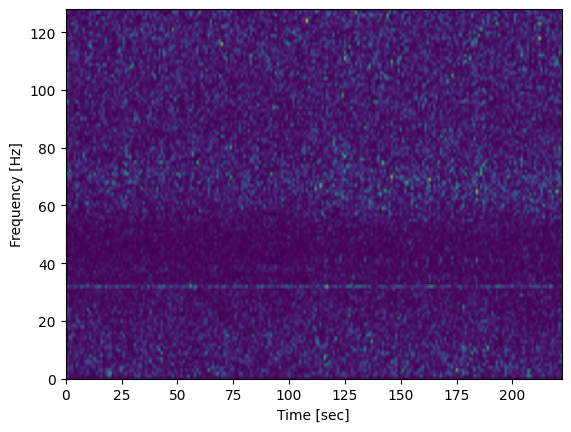

In [ ]:
plt.pcolormesh(Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
print('shape of one spectrogram dataset'+str(np.shape(x_list)))

shape of one spectrogram dataset(11350, 201, 223)


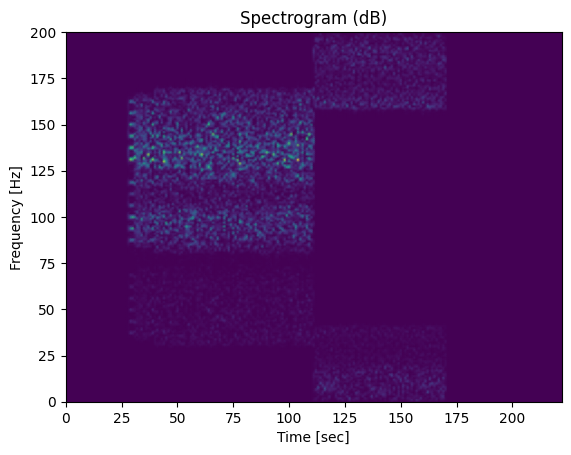

In [ ]:
# JUST PLOT TO CHECK THE SPECTROGRAMS
idx=10000
plt.title("Spectrogram (dB)")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.pcolormesh(x_list[idx], shading='gouraud')

In [ ]:
X=np.array(x_list)
x_r = x[:,:5000]
print(x_r.shape)
print(X.shape)

(11350, 5000)
(11350, 201, 223)


In [ ]:
x_train_s, x_test_s, x_train_r, x_test_r, y_train, y_test = train_test_split(X, x_r, y3, test_size=0.2, random_state=43, shuffle=True)
print(x_train_r.shape)
print(x_train_s.shape)
print(y_train.shape)
print(x_test_r.shape)
print(x_test_s.shape)
print(y_test.shape)

(9080, 5000)
(9080, 201, 223)
(9080, 10)
(2270, 5000)
(2270, 201, 223)
(2270, 10)


In [ ]:
# reshape input to be [samples, time steps, features = 1] as the model requires this 3D shape imput
x_train_r = np.reshape(x_train_r, (x_train_r.shape[0], x_train_r.shape[1], 1))
x_test_r = np.reshape(x_test_r, (x_test_r.shape[0], x_test_r.shape[1], 1))
x_train_s = np.reshape(x_train_s, (x_train_s.shape[0], x_train_s.shape[1], x_train_s.shape[2], 1))
x_test_s = np.reshape(x_test_s, (x_test_s.shape[0], x_test_s.shape[1], x_test_s.shape[2], 1))
print(x_train_r.shape)
print(x_test_r.shape)
print(x_train_s.shape)
print(x_test_s.shape)

(9080, 5000, 1)
(2270, 5000, 1)
(9080, 201, 223, 1)
(2270, 201, 223, 1)


# MULTISCALE CNN TRAINING

## FOR TIME DOMAIN AND FREQ DOMAIN DATA

In [ ]:
from tensorflow.keras import backend as Ke
from tensorflow.keras.layers import concatenate, Input, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
Ke.clear_session()
raw_input=Input(shape=(5000,1),name="rawInput")
x=Conv1D(32,7,padding='same', activation='relu',strides=2)(raw_input)
x=MaxPooling1D(pool_size=4,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(64,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(128,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

# x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

# x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

raw_output=GlobalMaxPooling1D()(x)
raw_model=keras.Model(raw_input, raw_output, name="rawModel")
raw_model.summary()

NameError: ignored

In [ ]:
Ke.clear_session()
freq_input=Input(shape=(2047,1),name="freqInput")
x=Conv1D(32,7,padding='same', activation='relu',strides=2)(freq_input)
x=MaxPooling1D(pool_size=4,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(64,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(128,7,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='same')(x)
x=Dropout(rate = 0.25)(x)

# x=Conv1D(256,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

# x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

# x=Conv1D(512,7,padding='same', activation='relu',strides=1)(x)
# x=MaxPooling1D(pool_size=2,padding='same')(x)
# x=Dropout(rate = 0.25)(x)

freq_output=GlobalMaxPooling1D()(x)
freq_model=keras.Model(freq_input, freq_output, name="freqModel")
freq_model.summary()

In [ ]:
Ke.clear_session()
input_raw=Input(shape=(5000,1),name="raw")
raw=raw_model(input_raw)

input_freq=Input(shape=(2047,1),name="freq")
freq=freq_model(input_freq)


concat=concatenate([raw,freq])
hidden=Dropout(0.25)(concat)

# hidden=Dense(512,activation='relu')(hidden)
# hidden=Dropout(0.25)(hidden)
# hidden=Dense(512,activation='relu')(hidden)
# hidden=Dropout(0.25)(hidden)
# hidden=Dense(256,activation='relu')(hidden)
# hidden=Dropout(0.25)(hidden)
# hidden=Dense(256,activation='relu')(hidden)
# hidden=Dropout(0.25)(hidden)

hidden=Dense(128,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)

hidden=Dense(64,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)

hidden=Dense(32,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)

output=Dense(4,activation='softmax')(hidden)
net=tf.keras.Model([input_raw,input_freq], output, name="Net")

net.summary()

In [ ]:
#keras.utils.plot_model(net, "net.png", show_shapes=True)
from tensorflow.keras.utils import plot_model
plot_model(net, "net.png", show_shapes=True)

In [ ]:

learning_rate = 0.01 # initial learning rate
decay_rate = 0.1
opt=keras.optimizers.Adam(learning_rate=learning_rate)
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

# learning schedule callback
loss_history = tf.keras.callbacks.History()
lr_rate = tf.keras.callbacks.LearningRateScheduler(exp_decay)

estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=30 , verbose=1, mode='auto',restore_best_weights=True)
callbacks_list = [loss_history, lr_rate]

In [ ]:
opt=keras.optimizers.Adam(learning_rate=0.00001)
net.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=30 , verbose=1, mode='auto',restore_best_weights=True) #, callbacks = [estp]
history = net.fit({"raw":x_train_r,"freq":x_train_f}, y_train,
                  batch_size=128, epochs=300, verbose = 1, validation_split=0.2, callbacks = [estp])  #, callbacks = [estp]
history_dict = history.history
history_dict.keys()
results = net.evaluate({"raw":x_test_r,"freq":x_test_f}, y_test)

In [ ]:
# results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

In [ ]:
net2 = tf.keras.models.load_model("/content/drive/MyDrive/Sayantika/model_4_class")

In [ ]:
accuracy = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_train_acc.txt")
val_accuracy = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_val_acc.txt")
loss = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_train_loss.txt")
val_loss = np.loadtxt("/content/drive/MyDrive/Sayantika/model_4_class/4C_val_loss.txt")

In [ ]:
#PLOT TRAINING CURVES
# val_loss = history.history['val_loss']
# loss = history.history['loss']
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# plt.rcParams['figure.figsize'] = [ 10,8]
plt.rcParams['figure.figsize'] = [10, 5]
ax=plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss', color='red')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()

ax=plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
plt.title('Training and validation accuracy', fontsize=15)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# save the plot varriables
train_loss=history.history['loss']; filepath_tloss='/content/drive/MyDrive/Sayantika/model_10_class_8744/train_loss.txt'; np.savetxt(filepath_tloss,train_loss)
val_loss=history.history['val_loss']; filepath_vloss='/content/drive/MyDrive/Sayantika/model_10_class_8744/val_loss.txt'; np.savetxt(filepath_vloss,val_loss)
acc=history.history['accuracy'];      filepath_tacc='/content/drive/MyDrive/Sayantika/model_10_class_8744/train_acc.txt'; np.savetxt(filepath_tacc,acc)
val_acc=history.history['val_accuracy']; filepath_vacc='/content/drive/MyDrive/Sayantika/model_10_class_8744/val_acc.txt'; np.savetxt(filepath_vacc,val_acc)

In [ ]:
net.save('/content/drive/MyDrive/Sayantika/model_10_class_8744') #save model

In [ ]:
# prediction using CNN
predicted=net2.predict({"raw":x_test_r,"freq":x_test_f})
Y_pred=predicted.argmax(axis=-1)

Y_true = decode(y_test)
Y_true.shape

In [ ]:
q=np.array(Y_pred) #2-class
label_l=[]
for i in range (q.shape[0]):
  if q[i]==0:
    label_l.append('No Drone')
  elif q[i]==1:
    label_l.append('Drone')

Label_ar=np.array(label_l)

In [ ]:
q=np.array(Y_pred) #4-class
label_l=[]
for i in range (q.shape[0]):
  if q[i]==0:
    label_l.append('No Drone')
  elif q[i]==1:
    label_l.append('Bebop')
  elif q[i]==2:
    label_l.append('AR')
  elif q[i]==3:
    label_l.append('Phantom')

Label_ar=np.array(label_l)

In [ ]:
q=np.array(Y_pred) #10-class ','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1
label_l=[]
for i in range (q.shape[0]):
  if q[i]==0:
    label_l.append('No Drone')
  elif q[i]==1:
    label_l.append('Bebop m1')
  elif q[i]==2:
    label_l.append('Bebop m2')
  elif q[i]==3:
    label_l.append('Bebop m3')
  elif q[i]==4:
    label_l.append('Bebop m4')
  elif q[i]==5:
    label_l.append('AR m1')
  elif q[i]==6:
    label_l.append('AR m2')
  elif q[i]==7:
    label_l.append('AR m3')
  elif q[i]==8:
    label_l.append('AR m4')
  elif q[i]==9:
    label_l.append('Phantom m1')

Label_ar=np.array(label_l)

In [ ]:
#TSNE PLOTS
import seaborn as sns
from sklearn.manifold import TSNE
# out_dense= keras.Model(inputs=model.input,outputs=model.get_layer('dense_5').output)
# Y_denseout = out_dense.predict(x_test) #predicted Y

tsne = TSNE(n_components=2,learning_rate='auto',init='random')
Y_embedded = tsne.fit_transform(predicted)
plt.figure(figsize=(10,8))
sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], hue=Label_ar)
plt.xlabel("Dimension 1",fontweight ='bold', fontsize = 15);
plt.ylabel("Dimenssion 2",fontweight ='bold', fontsize = 15)
plt.title('t-SNE plot After applying Lightweight CNN',fontweight ='bold', fontsize = 15)

In [ ]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(Y_true,Y_pred)
cm_norm3=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm3)  #10 class
cm_norm3 = cm_norm3*100
cm_norm3=np.round_(cm_norm3,decimals=2)
print(cm_norm3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_true,Y_pred)
cm_norm=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm)  #4 class

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_true,Y_pred)
cm_norm1=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm1)
print(cm_norm1) #2 class

In [ ]:
cm_norm #4 class

In [ ]:
cm_norm2 = np.array([[0.9975,0.0024,0,0],[0,0.9771,0.018,0.0049],[0,0.0024,0.9896,0.0084],[0,0,0.015,0.985]])
cm_norm2 = cm_norm2*100
cm_norm2

In [ ]:
cm_norm1 = np.array([[0.9952,0.0048],[0.0011,0.9989]])
cm_norm1= cm_norm1*100
cm_norm1

In [ ]:
cm_norm3 = np.array([[0.99,0,0,0,0,0,0,0.0024,0.0072,0],
                    [0,0.54,0.29,0.0045,0,0.12,0,0.0045,0.036,0.0045],
                    [0,0.34,0.55,0.02,0,0.087,0.0051,0,0,0],
                    [0,0.067,0.12,0.75,0.9,0.015,0,0.0049,0.039,0.0049],
                    [0,0,0.024,0.015,0.9,0.015,0,0.0049,0.039,0.0049],
                    [0,0.0047,0.0047,0,0,0.99,0,0.0047,0,0],
                    [0,0,0,0,0,0.036,0.92,0.009,0.027,0.0045],
                    [0,0.0047,0,0,0,0.0047,0.0093,0.89,0.088,0],
                    [0,0,0,0,0,0.011,0.038,0.46,0.49,0],
                    [0.0049,0,0,0,0,0,0.015,0,0.0049,0.98]])
cm_norm3= cm_norm3*100
cm_norm3 = np.round_(cm_norm3, decimals = 2 )
cm_norm3

In [ ]:
filepath_cm='/content/drive/MyDrive/Sayantika/cm_10class_86.txt';
np.savetxt(filepath_cm,cm3)

In [ ]:
#MULTICLASS CLASSIFICATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_true, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_true, Y_pred, average=None)
avg_precision = precision_score(Y_true, Y_pred, average='macro')
print('Precision:')
print(precision)
print(avg_precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_true, Y_pred, average=None)
avg_recall = recall_score(Y_true, Y_pred, average='macro')
print('Recall:')
print(recall)
print(avg_recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_true, Y_pred, average=None)
avg_f1 = f1_score(Y_true, Y_pred, average='macro')
print('F1 score:')
print(f1)
print(avg_f1)


In [ ]:
#BINARY CLASSIFICATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_true, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_true, Y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_true, Y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_true, Y_pred)
print('F1 score: %f' % f1)


In [ ]:
import pandas as pd
import seaborn as sns

plt.figure(figsize=(35,10))
# plt.figure(figsize=(10,10))

sns.set(font_scale=1.3)

cm_df_norm1 = pd.DataFrame(cm_norm1,
                     index = ['No Drone','Drone'],
                     columns = ['No Drone','Drone'])
plt.subplot(131)
sns.heatmap(cm_df_norm1,annot=True, fmt='g', cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

cm_df_norm2 = pd.DataFrame(cm_norm2,
                     index = ['No Drone','Bebop', 'AR', 'Phantom'],
                     columns = ['No Drone','Bebop', 'AR', 'Phantom'])
plt.subplot(132)
sns.heatmap(cm_df_norm2,annot=True, fmt='g', cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

cm_df_norm3 = pd.DataFrame(cm_norm3,
                     index = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'],
                     columns = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'])
plt.subplot(133)
sns.heatmap(cm_df_norm3,annot=True, fmt = "g", cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# plt.subplots_adjust(left=0.1,
#                     # bottom=0.1,
#                     # right=0.9
#                     # top=0.9,
#                     wspace=0.3)
#                     # hspace=0.4)
plt.show()

# print(cm)

In [ ]:
plt.figure(figsize=(30,10))
cm_df_norm3 = pd.DataFrame(cm_norm3,
                     index = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'],
                     columns = ['No Drone','Bebop m1','Bebop m2', 'Bebop m3', 'Bebop m4', 'AR m1', 'AR m2', 'AR m3', 'AR m4', 'Phantom m1'])
sns.heatmap(cm_df_norm3,annot=True, fmt='g', cbar = False)
plt.title('Normalised Confusion Matrix (%)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## FOR SPECTOGRAMS AND TIME DOMAIN DATA

In [ ]:
from tensorflow.keras import backend as Ke
from tensorflow.keras.layers import concatenate, Input, GlobalMaxPooling1D
Ke.clear_session()
raw_input=Input(shape=(5000,1),name="rawInput")
x=Conv1D(32,5,padding='same', activation='relu',strides=2)(raw_input)
x=MaxPooling1D(pool_size=4,padding='valid')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(64,5,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='valid')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(128,5,padding='same', activation='relu',strides=2)(x)
x=MaxPooling1D(pool_size=2,padding='valid')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(128,3,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='valid')(x)
x=Dropout(rate = 0.25)(x)

x=Conv1D(256,3,padding='same', activation='relu',strides=1)(x)
x=MaxPooling1D(pool_size=2,padding='valid')(x)
x=Dropout(rate = 0.25)(x)

raw_output=GlobalMaxPooling1D()(x)
raw_model=keras.Model(raw_input, raw_output, name="rawModel")

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
Ke.clear_session()
spectrogram_input=Input(shape=(201,223,1),name="spectogramInput")
x=Conv2D(32,[3,3],padding='same', activation='relu', strides=(2, 2))(spectrogram_input)
x=MaxPooling2D(pool_size=(4, 4),padding='same', data_format='channels_last')(x)

x=Conv2D(64,[3,3],padding='same', activation='relu', strides=(2, 2))(x)
x=MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last')(x)

x=Conv2D(128,[5,5],padding='same', activation='relu', strides=(2, 2))(x)
x=MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last')(x)

x=Conv2D(128,[5,5],padding='same', activation='relu', strides=(1, 1))(x)
x=MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last')(x)

x=Conv2D(256,[5,5],padding='same', activation='relu', strides=(1, 1))(x)
x=MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last')(x)

spectrogram_output=GlobalMaxPooling2D()(x)

spectrogram_model=keras.Model(spectrogram_input, spectrogram_output, name="spectrogramModel")

In [ ]:
Ke.clear_session()
input_raw=Input(shape=(5000,1),name="raw")
raw=raw_model(input_raw)

input_spectrogram=keras.layers.Input(shape=(201,223,1),name="spectrogram")
spec=spectrogram_model(input_spectrogram)


concat=concatenate([raw,spec])
hidden=Dropout(0.25)(concat)

# hidden=Dense(512,activation='relu')(hidden)
# hidden=Dropout(0.25)(hidden)
# hidden=Dense(512,activation='relu')(hidden)
# hidden=Dropout(0.25)(hidden)
hidden=Dense(256,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)
hidden=Dense(128,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)
hidden=Dense(64,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)
hidden=Dense(32,activation='relu')(hidden)
hidden=Dropout(0.25)(hidden)
output=Dense(10,activation='softmax')(hidden)
net=tf.keras.Model([input_raw,input_spectrogram], output, name="Net")

net.summary()

In [ ]:
#keras.utils.plot_model(net, "net.png", show_shapes=True)
from tensorflow.keras.utils import plot_model
plot_model(net, "net.png", show_shapes=True)

In [ ]:
Ke.clear_session()
opt=keras.optimizers.Adam(lr=0.0001)
net.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
# estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=10 , verbose=1, mode='auto',restore_best_weights=True)
history = net.fit({"raw":x_train_r,"spectrogram":x_train_s}, y_train,
                  batch_size=128, epochs=300, verbose = 1, validation_split=0.2)
history_dict = history.history
history_dict.keys()
results = net.evaluate({"raw":x_test_r,"spectrogram":x_test_s}, y_test)

In [ ]:
# results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

In [ ]:
#PLOT TRAINING CURVES
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
ax=plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss', color='red')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()

ax=plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
plt.title('Training and validation accuracy', fontsize=15)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# prediction using CNN
predicted=net.predict({"raw":x_test_r,"spectrogram":x_test_s})
Y_pred=predicted.argmax(axis=-1)

Y_true = decode(y_test)
Y_true.shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_true,Y_pred)
cm_norm=confusion_matrix(Y_true,Y_pred,normalize='true')
print(cm)

In [ ]:
import pandas as pd
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['No Drone','Bebop','AR','Phantom'],
                     columns = ['No Drone','Bebop','AR','Phantom'])
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

cm_df_norm = pd.DataFrame(cm_norm,
                     index = ['No Drone','Bebop','AR','Phantom'],
                     columns = ['No Drone','Bebop','AR','Phantom'])
# ['No Drone','Bebop','AR','Phantom']
plt.subplot(122)
sns.heatmap(cm_df_norm,annot=True)
plt.title('Normalised Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# print(cm)

# CNN MODEL TRAINING

In [ ]:
model = Sequential()
seq_length=5000
num_ch=1
# prepare model
filters1=256
filters2=128
filters3=64

kernel_size=5

model.add(Conv1D(filters3, kernel_size, padding='valid', activation='relu',strides=2, input_shape=(seq_length,num_ch)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate = 0.25))

# model.add(Conv1D(filters2, kernel_size, activation='relu', strides=1))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(rate = 0.5))

# model.add(Conv1D(filters3, kernel_size=5, strides=1, activation='relu',kernel_initializer='he_uniform'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(rate = 0.25))

# model.add(Conv1D(filters2, kernel_size=5, strides=3, activation='relu',kernel_initializer='he_uniform'))
# model.add(MaxPooling1D(pool_size=5))

model.add(Flatten())
# model.add(Dropout(0.15))
# model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.20))
# model.add(Dense(128, input_dim = seq_length, activation = 'relu'))
# model.add(Dropout(rate = 0.25))

model.add(Dense(64, input_dim = seq_length, activation = 'relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(32, input_dim = seq_length, activation = 'relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(4, activation='softmax'))

optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2498, 64)          384       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1249, 64)         0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 1249, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 79936)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                5115968   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
seq_length=5000
num_ch=1
filters1=256
filters2=128
filters3=64
kernel_size=5

model1 = Sequential()
model1 = Conv1D(filters3, kernel_size, padding='valid', activation='relu',strides=2)(input_shape=(seq_length,num_ch))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Dropout(rate = 0.25))
model1.add(Flatten())

model1.add(Dense(64, input_dim = seq_length, activation = 'relu'))
model1.add(Dropout(rate = 0.25))

model1.add(Dense(32, input_dim = seq_length, activation = 'relu'))
model1.add(Dropout(rate = 0.25))

model1.add(Dense(4, activation='softmax'))

optimizer=keras.optimizers.Adam(lr=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model1.summary()

In [ ]:
model = Sequential()
seq_length=5000
model.add(Dense(256, input_dim = seq_length, activation = 'relu'))
model.add(Dense(256, input_dim = seq_length, activation = 'relu'))
model.add(Dense(128, input_dim = seq_length, activation = 'relu'))
model.add(Dense(64, input_dim = seq_length, activation = 'relu'))
model.add(Dense(32, input_dim = seq_length, activation = 'relu'))
model.add(Dense(32, input_dim = seq_length, activation = inner_activation_fun))

model.add(Dense(4, activation = 'softmax'))
# optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose = 1, validation_split=0.2)
#                   callbacks=[es])
history_dict = history.history
history_dict.keys()
#
results = model.evaluate(x_test, y_test)

Epoch 1/100
227/227 [==============================] - 2s 6ms/step - loss: 1.0295 - accuracy: 0.4765 - val_loss: 0.8446 - val_accuracy: 0.5876
Epoch 2/100
227/227 [==============================] - 1s 5ms/step - loss: 0.7653 - accuracy: 0.6345 - val_loss: 0.7123 - val_accuracy: 0.7775
Epoch 3/100
227/227 [==============================] - 1s 6ms/step - loss: 0.4759 - accuracy: 0.8223 - val_loss: 0.5090 - val_accuracy: 0.8210
Epoch 4/100
227/227 [==============================] - 1s 5ms/step - loss: 0.3133 - accuracy: 0.8801 - val_loss: 0.5870 - val_accuracy: 0.8183
Epoch 5/100
227/227 [==============================] - 1s 5ms/step - loss: 0.2231 - accuracy: 0.9100 - val_loss: 0.5554 - val_accuracy: 0.8199
Epoch 6/100
227/227 [==============================] - 1s 5ms/step - loss: 0.1534 - accuracy: 0.9343 - val_loss: 0.6590 - val_accuracy: 0.8398
Epoch 7/100
227/227 [==============================] - 1s 6ms/step - loss: 0.1367 - accuracy: 0.9564 - val_loss: 0.5755 - val_accuracy: 0.8596

In [ ]:
# results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Accuracy on test set: [0.9844774007797241, 0.8224669694900513]
Test loss: 0.9844774007797241
Test accuracy: 0.8224669694900513


In [ ]:
#PLOT TRAINING CURVES
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
ax=plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()

ax=plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
plt.title('Training and validation accuracy', fontsize=15)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

# DNN MODEL WITH 10-FOLD

In [ ]:
cvscores1    = []
cnt         = 0
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
for train, test in kfold.split(x_new, decode(y2)):
    cnt = cnt + 1
    print(cnt)
    model = Sequential()
    for i in range(number_inner_layers):
        model.add(Dense(int(number_inner_neurons/2), input_dim = x_new.shape[1], activation = inner_activation_fun))
    model.add(Dense(y2.shape[1], activation = outer_activation_fun))
    model.compile(loss = optimizer_loss_fun, optimizer = optimizer_algorithm, metrics =         ['accuracy'])
    model.fit(x_new[train], y2[train], epochs = number_epoch, batch_size = batch_length, verbose = show_inter_results)
    scores = model.evaluate(x_new[test], y2[test], verbose = show_inter_results)
    print(scores[1]*100)
    cvscores2.append(scores[1]*100)
    y_pred = model.predict(x_new[test])
    np.savetxt("Results_1%s.csv" % cnt, np.column_stack((y1[test], y_pred)), delimiter=",", fmt='%s')

In [ ]:
cvscores #10 classes

In [ ]:
cvscores1 #2 classes